# 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pymongo import MongoClient

pd.set_option('display.max_columns', None)

---
# 2. Connect to MongoDB Compass

In [ ]:
# Instantiate MongoDB client by localhost 27017
client = MongoClient("mongodb://localhost:27017")

# Get database logee_trans
db = client.get_database("logee_trans")

# Retrieve collection deliveryDetails from database
deliv_details = db.get_collection("deliveryDetails")

---
# 3. Convert Data
Convert the retrieved .json format data into pandas dataframe.

In [ ]:
df_delivery = pd.DataFrame(list(deliv_details.find({})))

# 4. Check Data

Check information and shape of delivery data.

In [ ]:
print(df_delivery.info())
print(df_delivery.shape)
display(df_delivery.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13737 entries, 0 to 13736
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _id                            13737 non-null  object 
 1   orderNumber                    13728 non-null  object 
 2   originLatitude                 13728 non-null  object 
 3   destinationAddress             13728 non-null  object 
 4   distance                       13728 non-null  object 
 5   originAddress                  13728 non-null  object 
 6   itemHeight                     5623 non-null   float64
 7   itemValue                      13728 non-null  object 
 8   destinationLocation            13728 non-null  object 
 9   vehicleGroupName               13728 non-null  object 
 10  itemCategoryId                 13728 non-null  object 
 11  itemName                       13728 non-null  object 
 12  pickupTime                     13728 non-null 

,_id,orderNumber,originLatitude,destinationAddress,distance,originAddress,itemHeight,itemValue,destinationLocation,vehicleGroupName,itemCategoryId,itemName,pickupTime,originCity,itemWidth,vehicleGroupId,destinationLatitude,itemWeight,sendCompanyPartnerFirst,originPicName,itemPackage,destinationPicPhone,destinationPicName,itemLength,deliveryNotes,destinationLongitude,originLocation,destinationCity,totalAmount,tripFeeAmount,originLongitude,originPicPhone,taxAmount,deliveryDetailId,insuranceAmount,escortId,driverHelper,availableToAll,documentId,fulfillment,isPaid,isActive,isDeleted,createdBy,createdAt,modifiedBy,modifiedAt,cargoCompanyId,deliveryDetailStatus,pricingId,itemCategoryName,truckCompanyName,cargoCompanyName,truckCompanyId,paymentOfCargoOwner,isConfirmed,rejectionLog,deliveryOrderFile,originCargoImage,destinationCargoImage,destinationCargoImageDate,receiverSignatureImage,receiverSignatureImageDate,reviewedDeliveryOrderFile,reviewedDeliveryOrderFileDate,originNotes,destinationNotes,termsAccepted,assignmentLetterFile,assignmentLetterFileDate,cargoInvoiceDate,cargoInvoiceFile,truckInvoiceDate,truckInvoiceFile,originCargoImageDate,delayTimeLimit,expireTimeLimit,delayedTo,expiredAt,invoiceDate,invoiceNumber,driverNote,paymentType,isProcessed,paymentTypeId,paymentTypeImage,paymentTypeName,paymentOfTruckOwner,cargoId,cargoType,containerNum,gatePassQr,userMeta,assignmentLetterDate,otpToken,truckCompanyPhone,internationalTradeType,gatepass,createdByEmail
0,5f151562f2a56c0010dd128f,LT-202007200002,-6.2382699,"Tanjung Priok, North Jakarta City, Jakarta, In...",28.0,"Bekasi, Bekasi City, West Java, Indonesia",1.0,0.0,Tanjung Priok,CDE Box,5b733160-dcd5-4626-9517-9ded376d4005,cons goods,2020-07-21T05:00:00.000Z,Bekasi,1.0,fa286b72-94f9-4172-8359-72d2da569535,-6.1320555,2.0,True,tono,Cartons,+62899988999,koko,1.0,masuk aja,106.8714848,Bekasi,Jakarta Utara,1815000.0,1650000.0,106.9755726,+628888888888,165000.0,9d211468-496d-424c-a868-758e64e7b3ce,0.0,,0.0,False,0ea32978-3645-478d-8f8e-b221220615ff,None,False,True,False,8e670c08-1974-4df1-ba97-870e6c6b06b5,2020-07-20T03:54:10.304Z,,2020-07-20T03:54:10.304Z,17717fa7-839a-4289-87cc-9f5c3057238d,"[{'code': '1', 'name': 'Mencari Truk', 'date':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f437721351da9001004d1e0,LT-202008240003,-6.1021109,"Kapuk Muara, Kec. Penjaringan, Kota Jkt Utara,...",28.1,"Tj. Priok, Kota Jkt Utara, Daerah Khusus Ibuko...",1.0,0.0,Kapuk Muara,Trailer Dry Container 40 Feet,5b733160-dcd5-4626-9517-9ded376d4005,ceramic,2020-08-24T16:00:00.000Z,Jakarta Utara,1.0,da30eafe-282c-494e-b06b-f9e0973cd75c,-6.1222055,32.0,True,GPI Logistics,Cartons,+6281110101917,CSA,1.0,tila mati malam ini,106.7647475,Terminal Container UTC II,Jakarta Utara,1815000.0,1650000.0,106.8863502,+6281313121615,165000.0,9374d9a5-c321-49de-8002-ea51f7962edc,0.0,,0.0,False,bf2c2343-ed24-4382-a542-852035920dd7,{'driverId': '86c83cd8-2ec8-40e0-a95c-336a6c7c...,True,True,False,c25b016b-4b26-4fe5-9530-5f50aafee7ca,2020-08-24T08:15:29.279Z,,2020-08-24T08:17:13.450Z,bcefe6e0-0dd1-47db-8b7a-493a96f60aa4,"[{'code': '2', 'name': 'Dapat Truk', 'date': '...",0b204379-5bfb-441c-8727-edaccbd8a611,Barang Jadi,GPI LOGISTICS TRUCKER,GPI LOGISTICS,4ca5420a-3bf3-402d-ad64-e95b6915bf24,"{'paymentStatus': 'Paid', 'paymentDate': '2020...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f509dbf351da9001004d220,LT-202009030014,-6.2167736,"Tj. Priok, Kota Jkt Utara, Daerah Khusus Ibuko...",52.6,"Kec. Cikupa, Tangerang, Banten, Indonesia",1.0,0.0,Tj. Priok,Trailer Dry Container 20 Feet,5b733160-dcd5-4626-9517-9ded376d4005,barang retail,2020-09-03T11:39:00.000Z,Tangerang,1.0,5f7e5631-86e5-486e-ab3a-4229ef29b97d,-6.1320555,15.0,False,beni,Palet

# 4. Data Manipulation

## 1. Subset Data 1

In this task, business operations division of PT. Logee Trans need a data of the average trip price (shipping cost) per kilometer for each type of vehicle (truck). Therefore, in this task, the columns that are important to use are:

1. truckCompanyId
2. truckCompanyName
3. vehicleGroupName
4. fulfillment
5. tripFeeAmount
6. distance
7. createdAt

In [ ]:
deliverynew = df_delivery[['truckCompanyId','truckCompanyName','vehicleGroupName','fulfillment','tripFeeAmount','distance','createdAt']]
deliverynew.head()

,truckCompanyId,truckCompanyName,vehicleGroupName,fulfillment,tripFeeAmount,distance,createdAt
0,NaN,NaN,CDE Box,None,1650000.0,28.0,2020-07-20T03:54:10.304Z
1,4ca5420a-3bf3-402d-ad64-e95b6915bf24,GPI LOGISTICS TRUCKER,Trailer Dry Container 40 Feet,{'driverId': '86c83cd8-2ec8-40e0-a95c-336a6c7c...,1650000.0,28.1,2020-08-24T08:15:29.279Z
2,dd9ea3da-7df9-448a-8f81-f7420ed377d2,AVI LOGISTICS TRUCKER,Trailer Dry Container 20 Feet,{'driverId': '16469adb-7d50-41b9-aa66-67e4d2f6...,1500000.0,52.6,2020-09-03T07:39:43.535Z
3,dd9ea3da-7df9-448a-8f81-f7420ed377d2,AVI LOGISTICS TRUCKER,Trailer Dry Container 20 Feet,{'driverId': 'aa421aa9-9594-4d00-9475-651e598a...,1800000.0,75.6,2020-09-03T08:13:44.226Z
4,dd9ea3da-7df9-448a-8f81-f7420ed377d2,AVI LOGISTICS TRUCKER,Trailer Dry Container 20 Feet,{'driverId': '9dd65c45-e05f-4207-8fac-c00acd7c...,1500000.0,29.4,2020-09-07T13:23:37.738Z


## 2. Data Transformation 1

Replace numpy nan into pandas NA.

In [ ]:
deliverynew.fillna(pd.NA,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
deliverynew.head()

,truckCompanyId,truckCompanyName,vehicleGroupName,fulfillment,tripFeeAmount,distance,createdAt
0,<NA>,<NA>,CDE Box,<NA>,1650000.0,28.0,2020-07-20T03:54:10.304Z
1,4ca5420a-3bf3-402d-ad64-e95b6915bf24,GPI LOGISTICS TRUCKER,Trailer Dry Container 40 Feet,{'driverId': '86c83cd8-2ec8-40e0-a95c-336a6c7c...,1650000.0,28.1,2020-08-24T08:15:29.279Z
2,dd9ea3da-7df9-448a-8f81-f7420ed377d2,AVI LOGISTICS TRUCKER,Trailer Dry Container 20 Feet,{'driverId': '16469adb-7d50-41b9-aa66-67e4d2f6...,1500000.0,52.6,2020-09-03T07:39:43.535Z
3,dd9ea3da-7df9-448a-8f81-f7420ed377d2,AVI LOGISTICS TRUCKER,Trailer Dry Container 20 Feet,{'driverId': 'aa421aa9-9594-4d00-9475-651e598a...,1800000.0,75.6,2020-09-03T08:13:44.226Z
4,dd9ea3da-7df9-448a-8f81-f7420ed377d2,AVI LOGISTICS TRUCKER,Trailer Dry Container 20 Feet,{'driverId': '9dd65c45-e05f-4207-8fac-c00acd7c...,1500000.0,29.4,2020-09-07T13:23:37.738Z


## 3. Drop Missing Values

In [ ]:
deliverynew.isna().sum()

truckCompanyId       57
truckCompanyName     21
vehicleGroupName      9
fulfillment         665
tripFeeAmount         9
distance              9
createdAt             9
dtype: int64

In [ ]:
# Delete records with missing value based on truckCompanId column
deliverynew.dropna(subset=['truckCompanyId'], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
deliverynew.isna().sum()

truckCompanyId        0
truckCompanyName      0
vehicleGroupName      0
fulfillment         608
tripFeeAmount         0
distance              0
createdAt             0
dtype: int64

## 4. Data Transformation 2

Delete spaces in truckCompanyName column and rearrange data in ascending sort based on this column.

In [ ]:
deliverynew.loc[:,'truckCompanyName'] = deliverynew.truckCompanyName.apply(lambda x : x.strip())
deliverynew.sort_values(by='truckCompanyName',ascending=True,inplace=True)
deliverynew.reset_index(inplace=True)
deliverynew.drop('index',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [ ]:
print(deliverynew.shape)
display(deliverynew.head())

(13680, 7)


,truckCompanyId,truckCompanyName,vehicleGroupName,fulfillment,tripFeeAmount,distance,createdAt
0,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,{'driverId': '30191ca4-3b9d-46d3-be84-fe9ffca5...,6500000.0,439,2021-06-17T12:53:50.869Z
1,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,{'driverId': 'ff9897b1-587c-46d0-ab0c-c173632b...,6000000.0,228,2021-06-24T13:05:56.431Z
2,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,{'driverId': '9b01a5b7-aa2a-478c-9925-6bbc41ae...,2800000.0,149,2021-06-15T14:42:28.339Z
3,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,{'driverId': '5699f48a-cee6-4d46-b15e-7e1eb4b4...,6000000.0,228,2021-06-24T13:06:57.530Z
4,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,{'driverId': 'ff9897b1-587c-46d0-ab0c-c173632b...,5000000.0,173,2021-06-08T04:47:33.307Z


## 5. Import Dummy

In [ ]:
dummy = pd.read_excel('Data Dummy Perusahaan.xlsx')
dummy

## 6. Create List

Create a new list object that contains companies id from dummy data.

In [ ]:
idummy = list(dummy['CompanyID'].unique())
display(idummy)

['1c4a8de8-d998-4e33-9032-59133b40bb35',
 'b192e134-3c2b-4e8f-ae86-8734229ac194',
 '4188588f-634b-4f5a-a318-af63f0d7092d',
 '916ec6d3-af29-4f7d-ba90-0b0892d83e71',
 '3e3dde23-e1c2-4929-a980-12ee3aa70056',
 'b19bb5b3-2215-440d-8c70-7a4be8e6bbdf',
 '17717fa7-839a-4289-87cc-9f5c3057238d',
 '40579fcb-3218-4f79-b473-a35c3345eeed',
 '7f507059-5a76-45b1-8c3d-a2d7f905f94a',
 '3bb917f7-fa36-4a1d-80cc-2608864c50c5',
 '96817a1a-a476-48cf-82e5-ce1c8ee8bd99',
 '0cbcff05-8dcd-4b95-9d3a-c69fc603a5e5',
 'bbcfe54e-306e-4ce5-8624-0f4038a83f0b',
 '17add240-988b-4bc6-bd1d-3e754dd29ceb',
 'ed04ac6a-910d-4eec-a2d0-de3565e2cd31',
 ' 4681cf8f-388b-47d7-9e7b-3219c8651d5d',
 ' 9edfe6a7-3ea0-49f9-a311-53828f7073d2',
 ' ba1ffb66-c90e-4140-ae62-c1f86a3e93ca',
 ' 3d1c5b96-2f59-4e43-8430-ca3a989b7494',
 ' fbb68258-16f7-41e8-a201-0a22673e8b74',
 ' f365240f-303e-451d-b6c2-b1218502fa81',
 ' cb4eb7b5-5ff3-4bab-ac93-ffaa84a48a54',
 ' de98c7e5-18d6-4683-8c39-51dcb9f3a189',
 ' 555853de-12b5-45a9-8d5c-3f3730dc4b83',
 ' 1fdb

## 7. Subset Data 2

Delete all records which have truck company id value in dummy data.

In [ ]:
delivery_not_dum = deliverynew[~deliverynew['truckCompanyId'].isin(idummy)]
delivery_not_dum = delivery_not_dum[~delivery_not_dum['truckCompanyName'].str.contains('DUM')]
delivery_not_dum = delivery_not_dum[~delivery_not_dum['truckCompanyName'].str.contains('HAGANTA')]
delivery_not_dum = delivery_not_dum[~delivery_not_dum['truckCompanyName'].str.contains('MANDIRI TRANSPORT')]
print(delivery_not_dum.shape)
display(delivery_not_dum.head())

(12374, 7)


,truckCompanyId,truckCompanyName,vehicleGroupName,fulfillment,tripFeeAmount,distance,createdAt
0,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,{'driverId': '30191ca4-3b9d-46d3-be84-fe9ffca5...,6500000.0,439,2021-06-17T12:53:50.869Z
1,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,{'driverId': 'ff9897b1-587c-46d0-ab0c-c173632b...,6000000.0,228,2021-06-24T13:05:56.431Z
2,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,{'driverId': '9b01a5b7-aa2a-478c-9925-6bbc41ae...,2800000.0,149,2021-06-15T14:42:28.339Z
3,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,{'driverId': '5699f48a-cee6-4d46-b15e-7e1eb4b4...,6000000.0,228,2021-06-24T13:06:57.530Z
4,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,{'driverId': 'ff9897b1-587c-46d0-ab0c-c173632b...,5000000.0,173,2021-06-08T04:47:33.307Z


Sekarang dapat dilihat jika data hasil filter dari dummy memiliki jumlah baris data 12.374 baris, dimana berkurang dari sebelumnya yaitu 13.680.

In [ ]:
#pd.options.display.float_format = '{:,.2f}'.format

## 8. Data Transformation 3

In this step, explode dictionary values in fulfillment column and create a new dataframe from the exploded data to obtain useful informations such as the police number of every truck.

In [ ]:
fulfillment = delivery_not_dum.fulfillment.apply(pd.Series)
fulfillment

,0,confirmDate,confirmedAt,confirmedBy,confirmedByEmail,driverEmail,driverId,driverName,driverPhone,tidNum,vehicleBrandName,vehicleId,vehicleImage,vehicleManufactureYear,vehiclePoliceNum
0,NaN,NaN,2021-06-17T12:58:35.390Z,9bdf790b-252b-4a97-86cf-66656ac70fbc,dyahayuz0809@gmail.com,,30191ca4-3b9d-46d3-be84-fe9ffca5ee98,SIHOTANG,082246608778,,Hino,d24440b0-7eec-4b4b-bd30-31f5ca134a4a,,2016.0,B9255UUX
1,NaN,NaN,2021-06-24T13:09:01.483Z,9bdf790b-252b-4a97-86cf-66656ac70fbc,dyahayuz0809@gmail.com,,ff9897b1-587c-46d0-ab0c-c173632bc127,IMIN,0819277281,,Hino,2e83d5df-3614-48e5-9fee-88d0a0a5bee6,,2013.0,B9600UEJ
2,NaN,NaN,2021-06-15T14:42:56.233Z,9bdf790b-252b-4a97-86cf-66656ac70fbc,dyahayuz0809@gmail.com,,9b01a5b7-aa2a-478c-9925-6bbc41aeb38e,JAMIL,081807573444,,Hino,f088dcf2-ffac-4a0e-81ca-26b1e52078cc,,2017.0,B9914UEJ
3,NaN,NaN,2021-06-24T13:10:05.676Z,9bdf790b-252b-4a97-86cf-66656ac70fbc,dyahayuz0809@gmail.com,,5699f48a-cee6-4d46-b15e-7e1eb4b40c78,CASDI,082340567890,,Hino,0e33f2a2-d663-46ca-b67b-f74777f072ec,,2013.0,B9848VO
4,NaN,NaN,2021-06-08T04:55:16.256Z,9bdf790b-252b-4a97-86cf-66656ac70fbc,dyahayuz0809@gmail.com,,ff9897b1-587c-46d0-ab0c-c173632bc127,IMIN,0819277281,,Hino,43fe6e2e-43b2-475f-a936-f54df20204be,,2010.0,B9522JE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13675,NaN,NaN,2021-05-31T03:47:50.396Z,be5b012b-6ddf-49fd-bef7-df9e9a059121,vtplog.trucker@gmail.com,,8dd8940f-053d-49ba-81c2-ad485b8aa984,JUMAIDIN,082336549824,,Hino,2f0d5422-4c60-4ac1-bc21-c4774b8b43fe,,2018.0,S9737UF
13676,NaN,NaN,2021-06-02T01:30:06.446Z,be5b012b-6ddf-49fd-bef7-df9e9a059121,vtplog.trucker@gmail.com,,49d8a104-227f-4c0a-be33-76cef990a153,M NUR MJT,085216587976,,Hino,bf49dbc3-5c92-4744-8bc7-569624b9ab5a,,2017.0,L9276UD
13677,NaN,NaN,2021-05-12T06:52:29.402Z,be5b012b-6ddf-49fd-bef7-df9e9a059121,vtplog.trucker@gmail.com,,8dd8940f-053d-49ba-81c2-ad485b8aa984,JUMAIDIN,082336549824,,Hino,2f0d5422-4c60-4ac1-bc21-c4774b8b43fe,,2018.0,S9737UF
13678,NaN,NaN,2021-05-31T04:09:06.384Z,be5b012b-6ddf-49fd-bef7-df9e9a059121,vtplog.trucker@gmail.com,,c4f37db2-7050-41f0-94b2-e7026af2db54,KARTONO,082219301044,,Hino,f88e581b-fee1-4571-ae5c-19b764720de2,,2013.0,S9726UH


In [ ]:
# Get only the police number
policeNum = fulfillment[['vehiclePoliceNum']]
polnum = policeNum.squeeze()

The next step is to insert policeNum column into delivery_not_dum dataframe to make data more easy to read. After that, we could drop fulfillment column.

In [ ]:
# Insert in position 3
delivery_not_dum.insert(loc=3,column='policeNumber',value=polnum)
# Delete fulfillment column
delivery_not_dum.drop('fulfillment',axis=1,inplace=True)
print(delivery_not_dum.shape)
display(delivery_not_dum.head())

(12374, 7)


,truckCompanyId,truckCompanyName,vehicleGroupName,policeNumber,tripFeeAmount,distance,createdAt
0,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9255UUX,6500000.0,439,2021-06-17T12:53:50.869Z
1,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,B9600UEJ,6000000.0,228,2021-06-24T13:05:56.431Z
2,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9914UEJ,2800000.0,149,2021-06-15T14:42:28.339Z
3,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,B9848VO,6000000.0,228,2021-06-24T13:06:57.530Z
4,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9522JE,5000000.0,173,2021-06-08T04:47:33.307Z


## 10. Data Transformation 4

Create new column named trip/KM that resulted from tripFeeAmount divided by distance column.

In [ ]:
delivery_not_dum['trip/KM'] = delivery_not_dum['tripFeeAmount']/delivery_not_dum['distance']
delivery_not_dum.loc[:,'trip/KM'] = delivery_not_dum['trip/KM'].apply(lambda x : round(x))
delivery_not_dum.head()

,truckCompanyId,truckCompanyName,vehicleGroupName,policeNumber,tripFeeAmount,distance,createdAt,trip/KM
0,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9255UUX,6500000.0,439,2021-06-17T12:53:50.869Z,14806
1,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,B9600UEJ,6000000.0,228,2021-06-24T13:05:56.431Z,26316
2,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9914UEJ,2800000.0,149,2021-06-15T14:42:28.339Z,18792
3,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,B9848VO,6000000.0,228,2021-06-24T13:06:57.530Z,26316
4,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9522JE,5000000.0,173,2021-06-08T04:47:33.307Z,28902


From createdAt, extract only the date, month, and year.

In [ ]:
def date(x):
    return x.split('T')[0]

delivery_not_dum.loc[:,'Date'] = delivery_not_dum['createdAt'].apply(lambda x : date(x))
delivery_not_dum.drop('createdAt',axis=1,inplace=True)

In [ ]:
delivery_not_dum.head()

,truckCompanyId,truckCompanyName,vehicleGroupName,policeNumber,tripFeeAmount,distance,trip/KM,Date
0,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9255UUX,6500000.0,439,14806,2021-06-17
1,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,B9600UEJ,6000000.0,228,26316,2021-06-24
2,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9914UEJ,2800000.0,149,18792,2021-06-15
3,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,B9848VO,6000000.0,228,26316,2021-06-24
4,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9522JE,5000000.0,173,28902,2021-06-08



Now obtain only 2021 records.

In [ ]:
delivery_2021 = delivery_not_dum[delivery_not_dum['Date'].str.contains('2021')]

Next, create new column Date that contains value of delivery date in year-month-date format.

In [ ]:
delivery_2021['Date'] = pd.to_datetime(delivery_2021['Date'], format= "%Y/%m/%d")

C:\Users\ASUS\AppData\Local\Temp/ipykernel_17040/3205185540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_2021['Date'] = pd.to_datetime(delivery_2021['Date'], format= "%Y/%m/%d")


In [ ]:
print(delivery_2021.shape)
display(delivery_2021.head())

(9632, 8)


,truckCompanyId,truckCompanyName,vehicleGroupName,policeNumber,tripFeeAmount,distance,trip/KM,Date
0,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9255UUX,6500000.0,439,14806,2021-06-17
1,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,B9600UEJ,6000000.0,228,26316,2021-06-24
2,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9914UEJ,2800000.0,149,18792,2021-06-15
3,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 20 Feet,B9848VO,6000000.0,228,26316,2021-06-24
4,3f80c58a-3947-4b73-ac24-a5d7bf94faf0,AGUNG MAKMUR JAYA,Trailer Dry Container 40 Feet,B9522JE,5000000.0,173,28902,2021-06-08


From the data above, there are 9632 records of delivery in 2021 or in other words, there are 9632 delivery activities in PT. Logee Trans.

# 11. Data Grouping

## A. Grup Based on All Columns

In [ ]:
delivery1 = delivery_2021.groupby(['truckCompanyName','vehicleGroupName','policeNumber','Date','trip/KM'])[['trip/KM']].count()
delivery1.head()

trip/KM
truckCompanyName  vehicleGroupName              policeNumber Date       trip/KM         
AGUNG MAKMUR JAYA Trailer Dry Container 20 Feet B9086DP      2021-06-11 51948          1
                                                             2021-06-15 26163          1
                                                             2021-06-19 45673          1
                                                             2021-06-28 68182          1
                                                B9214PN      2021-06-11 51948          1

## B. Grouped Based on truckCompanyName, vehicleGroupName, and policeNumber columns.

In [ ]:
delivery2 = delivery_2021.groupby(['truckCompanyName','vehicleGroupName','policeNumber'])[['trip/KM']].sum()
delivery2.columns = ['Total trip/KM']
delivery2.head()

Total trip/KM
truckCompanyName  vehicleGroupName              policeNumber               
AGUNG MAKMUR JAYA Trailer Dry Container 20 Feet B9086DP              191966
                                                B9214PN              191966
                                                B9417TU              150100
                                                B9600UEJ             150100
                                                B9848VO              129178

## C. Grouped Based on Total Sum of Trip/KM truckCompanyName and vehicleGroupName


In [ ]:
delivery3 = delivery_2021.groupby(['truckCompanyName','vehicleGroupName'])[['trip/KM']].sum()
delivery3.head()

trip/KM
truckCompanyName  vehicleGroupName                      
AGUNG MAKMUR JAYA Trailer Dry Container 20 Feet  1870711
                  Trailer Dry Container 40 Feet  4299409
AL ONE GJS        CDD Bak                          21236
                  CDD Box                          13587
                  Fuso Bak                         13447

## D. Grouped Based on Average of Trip/KM truckCompanyName and vehicleGroupName


In [ ]:
delivery4 = delivery_2021.groupby(['truckCompanyName','vehicleGroupName'])[['trip/KM']].mean().round()
delivery4.columns = ['Rata-rata Harga Trip/KM']
delivery4

Rata-rata Harga Trip/KM
truckCompanyName              vehicleGroupName                                      
AGUNG MAKMUR JAYA             Trailer Dry Container 20 Feet                  44541.0
                              Trailer Dry Container 40 Feet                  40947.0
AL ONE GJS                    CDD Bak                                        21236.0
                              CDD Box                                        13587.0
                              Fuso Bak                                       13447.0
...                                                                              ...
TUJUH BERKAH SEMESTA          CDD Box                                         7978.0
                              CDE Box                                         1926.0
                              Pick Up Box                                     8140.0
VARUNA TIRTA PRAKASYA TRUCKER Trailer Dry Container 40 Feet                   7185.0
                              Tronton Wingbox                               111346.0

[155 rows x 1 columns]

### Group Data Without truckCompanyName

In [ ]:
delivery4_1 = delivery_2021.groupby(['vehicleGroupName'])[['trip/KM']].mean().round()
delivery4_1 = delivery4_1.reset_index().sort_values(by='trip/KM',ascending=False).reset_index().drop('index',axis=1)
delivery4_1.head()

,vehicleGroupName,trip/KM
0,Trailer Dry Container 20 Feet,89182.0
1,Tronton Wingbox,72629.0
2,Tronton Box,63495.0
3,Trailer Dry Container 40 Feet,59119.0
4,Blind Van,51979.0


## E. Grouped Based on Average Trip/KM of truckCompanyName, vehicleGroupName, and policeNumber columns.

In [ ]:
delivery5 = delivery_2021.groupby(['truckCompanyName','vehicleGroupName','policeNumber'])[['trip/KM']].mean().round()
delivery5.columns = ['Rata-rata Harga Trip/KM']
delivery5

Rata-rata Harga Trip/KM
truckCompanyName              vehicleGroupName              policeNumber                         
AGUNG MAKMUR JAYA             Trailer Dry Container 20 Feet B9086DP                       47992.0
                                                            B9214PN                       47992.0
                                                            B9417TU                       37525.0
                                                            B9600UEJ                      37525.0
                                                            B9848VO                       32294.0
...                                                                                           ...
VARUNA TIRTA PRAKASYA TRUCKER Trailer Dry Container 40 Feet S9737UF                        2218.0
                                                            S9740UH                        2218.0
                                                            S9752UH                        2218.0
                                                            S9759UH                        2218.0
                              Tronton Wingbox               B9972IB                      111346.0

[799 rows x 1 columns]

### Group Data Without truckCompanyName

In [ ]:
delivery5_1 = delivery_2021.groupby(['vehicleGroupName','policeNumber'])[['trip/KM']].mean().round()
delivery5_1 = delivery5_1.reset_index().sort_values(by='trip/KM',ascending=False).reset_index().drop('index',axis=1)
delivery5_1.head()

,vehicleGroupName,policeNumber,trip/KM
0,CDD Box,B9815KXT,1753817.0
1,Tronton Wingbox,F8957GI,1086489.0
2,Tronton Wingbox,BM9297DU,1029508.0
3,Tronton Wingbox,F9571GS,895013.0
4,Tronton Wingbox,F8956BI,725873.0


## F. Grouped Based on Average Trip/KM of truckCompanyName, vehicleGroupName, policeNumber, and Date columns.

In [ ]:
delivery6 = delivery_2021.groupby(['truckCompanyName','vehicleGroupName','policeNumber','Date'])[['trip/KM']].mean().round()
delivery6.head() 

trip/KM
truckCompanyName  vehicleGroupName              policeNumber Date               
AGUNG MAKMUR JAYA Trailer Dry Container 20 Feet B9086DP      2021-06-11  51948.0
                                                             2021-06-15  26163.0
                                                             2021-06-19  45673.0
                                                             2021-06-28  68182.0
                                                B9214PN      2021-06-11  51948.0

# Insight

## Visualization

Visualize the total average of trip price per truck type in PT. Logee Trans.

C:\Users\ASUS\AppData\Local\Temp/ipykernel_17040/1435059428.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontdict = {'fontsize' : 30});


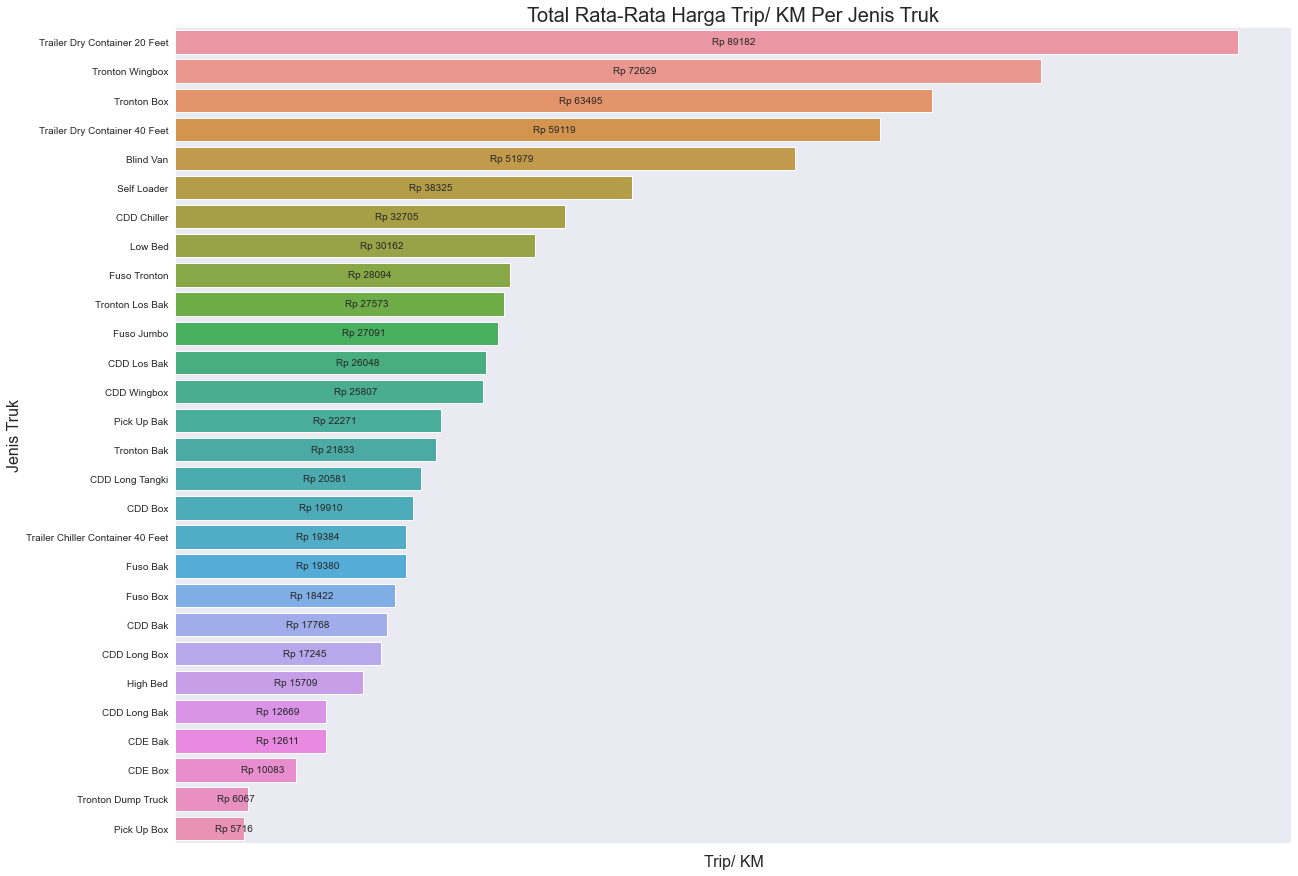

In [ ]:
sns.set_style('dark')
plt.figure(figsize = (20,15));
# Create bar plot to visualize trip/KM of every truck
ax = sns.barplot(x = 'trip/KM',y = 'vehicleGroupName' ,data = delivery4_1)
# 90 degree of trip/km label position
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontdict = {'fontsize' : 30});
plt.xlabel("Trip/ KM", size=16);
plt.ylabel("Jenis Truk", size=16);
plt.title("Total Rata-Rata Harga Trip/ KM Per Jenis Truk", size=20);
# Annotation
for p in ax.patches:
    ax.annotate("Rp %.0f" % p.get_width(), xy=(p.get_width()/2, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Conclusion

Based on the data and visualization above, we could conclude 2 things.

1. Based on the delivery4_1 data and the visualization above, it could be concluded that the 20 Feet Dry Container Trailer truck type has the highest average cost of shipping (trips) per kilometer. Meanwhile, the Pick Up Box truck type has the lowest average cost of shipping (trips) per kilometer.


2. However, if it is grouped based on the type of truck and license plate number, then based from delivery5_1 data, it is found that the CDD Box truck type with license plate number B 9815 KXT has the highest average shipping cost.